#### fazer um notebook 3.3 com analise entre os resultados das duas redes (ser criativo aqui e deixar tudo o mais bonito, usar pretty table etc; aqui entra tb a ideia que a ellloá deu de pegar uma imagem e dizer qual resultado cada modelo deu; acrescentar desafios enfrentados, sugestões de melhorias e próximos passos)

In [11]:
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from PIL import Image
import numpy as np
import tensorflow as tf

In [12]:
# Métricas simuladas para demonstração mobilenet -> resnet
metrics = {
    "Real" :{
        "Acurácia": [0.85, 0.87],
        "Precisão": [0.82, 0.87],
        "Revocação": [0.90, 0.88],
        "F1-Score": [0.86, 0.87],
        },
    "Fake": { 
        "Acurácia": [0.85, 0.88],
        "Precisão": [0.89, 0.87],
        "Revocação": [0.80, 0.87],
        "F1-Score": [0.84, 0.87],
        },
}

tempo_treinamento = [13500,50303]

tabela = PrettyTable()
tabela.field_names = ["Categoria" ,"Métricas", "Mobilenet", "Resnet"]


for category, metricas in metrics.items():
    tabela.add_row([category,"-","-","-"])   
    for metric, values in metricas.items():
        tabela.add_row(['',metric,f"{values[0]:.2f}",f"{values[1]:.2f}"])
    tabela.add_divider()
tabela.add_row(["-", "Tempo de Treinamento (s)", tempo_treinamento[0], tempo_treinamento[1]])

print("Comparação de Desempenho:")
print(tabela)


Comparação de Desempenho:
+-----------+--------------------------+-----------+--------+
| Categoria |         Métricas         | Mobilenet | Resnet |
+-----------+--------------------------+-----------+--------+
|    Real   |            -             |     -     |   -    |
|           |         Acurácia         |    0.85   |  0.87  |
|           |         Precisão         |    0.82   |  0.87  |
|           |        Revocação         |    0.90   |  0.88  |
|           |         F1-Score         |    0.86   |  0.87  |
+-----------+--------------------------+-----------+--------+
|    Fake   |            -             |     -     |   -    |
|           |         Acurácia         |    0.85   |  0.88  |
|           |         Precisão         |    0.89   |  0.87  |
|           |        Revocação         |    0.80   |  0.87  |
|           |         F1-Score         |    0.84   |  0.87  |
+-----------+--------------------------+-----------+--------+
|     -     | Tempo de Treinamento (s) |   1

In [13]:
import json

with open('../history_mobile.json','r') as file:
    data_mobile = json.load(file)
with open('../history_resnet.json','r') as file:
    data_resnet = json.load(file)

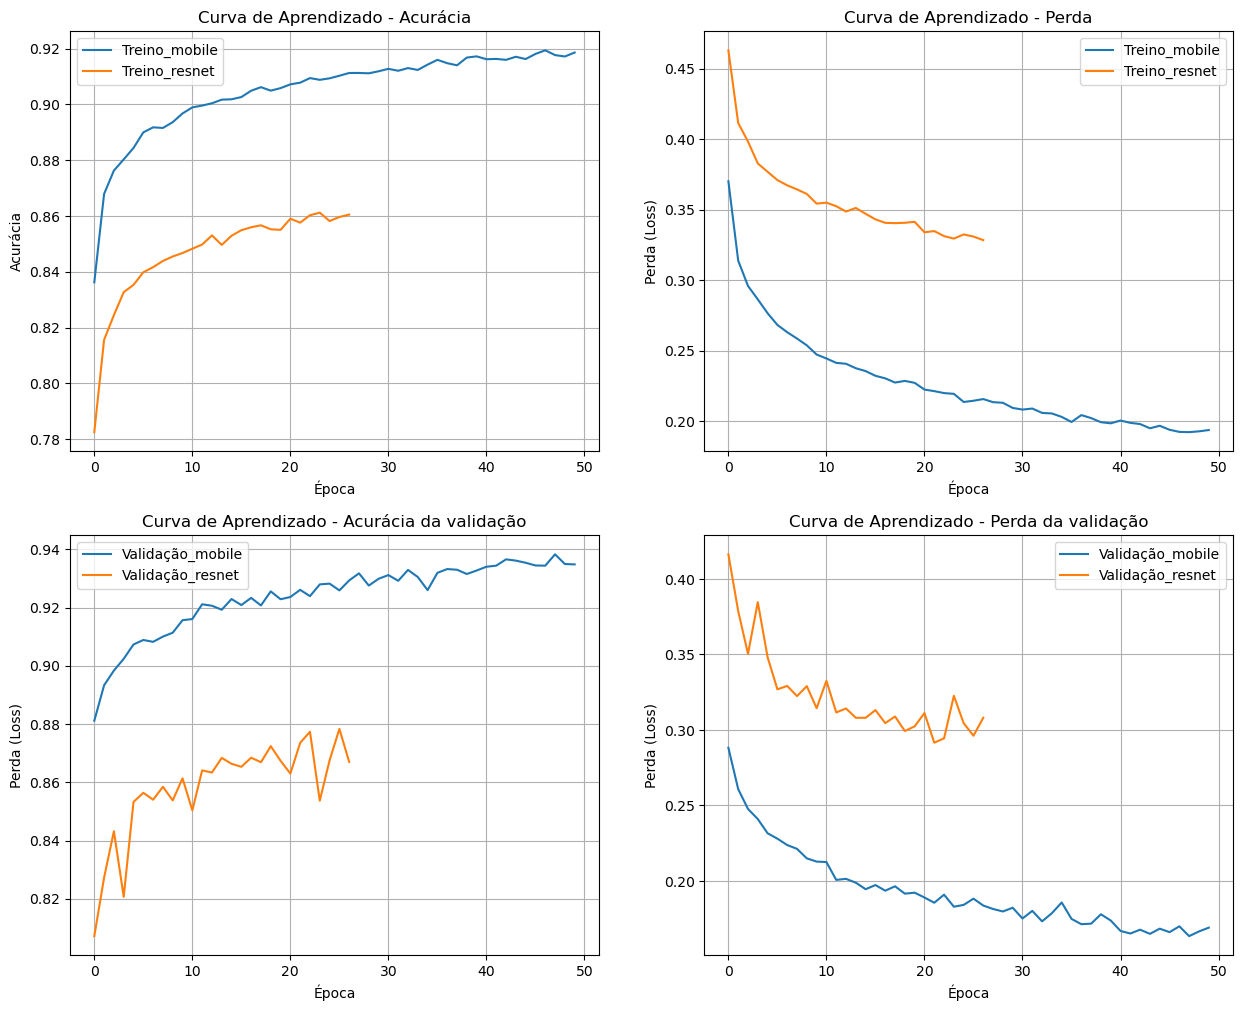

In [14]:
plt.figure(figsize=(15,12))
# Acurácia
plt.subplot(2, 2, 1)
plt.plot(data_mobile['accuracy'], label='Treino_mobile')
plt.plot(data_resnet['accuracy'], label='Treino_resnet')
plt.title("Curva de Aprendizado - Acurácia")
plt.xlabel("Época")
plt.ylabel("Acurácia")
plt.legend()
plt.grid()

# Perda
plt.subplot(2, 2, 2)
plt.plot(data_mobile['loss'], label='Treino_mobile')
plt.plot(data_resnet['loss'], label='Treino_resnet')
plt.title("Curva de Aprendizado - Perda")
plt.xlabel("Época")
plt.ylabel("Perda (Loss)")
plt.legend()
plt.grid()

# Validação da acurácia
plt.subplot(2, 2, 3)
plt.plot(data_mobile['val_accuracy'], label='Validação_mobile')
plt.plot(data_resnet['val_accuracy'], label='Validação_resnet')
plt.title("Curva de Aprendizado - Acurácia da validação")
plt.xlabel("Época")
plt.ylabel("Perda (Loss)")
plt.legend()
plt.grid()

# Validação da perda
plt.subplot(2, 2, 4)
plt.plot(data_mobile['val_loss'], label='Validação_mobile')
plt.plot(data_resnet['val_loss'], label='Validação_resnet')
plt.title("Curva de Aprendizado - Perda da validação")
plt.xlabel("Época")
plt.ylabel("Perda (Loss)")
plt.legend()
plt.grid()

plt.show()

#### Teste do modelo

In [15]:
from tensorflow import keras

resnet_path = "C:\\Users\\david\\Documents\\GitHub\\image-authenticity-classification\\resnet.keras"

resnet = keras.models.load_model(resnet_path)

In [16]:
# Carregando o conjunto de imagens de teste

img_size = (32, 32)
batch_size = 32
path_test = "../data/test"

ds_test = tf.keras.utils.image_dataset_from_directory(
    path_test,
    label_mode='int',
    image_size=img_size,
    batch_size=batch_size,
    shuffle=False
)

class_names = ds_test.class_names

Found 20000 files belonging to 2 classes.


In [17]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
ds_test = ds_test.map(lambda x, y: (normalization_layer(x), y))

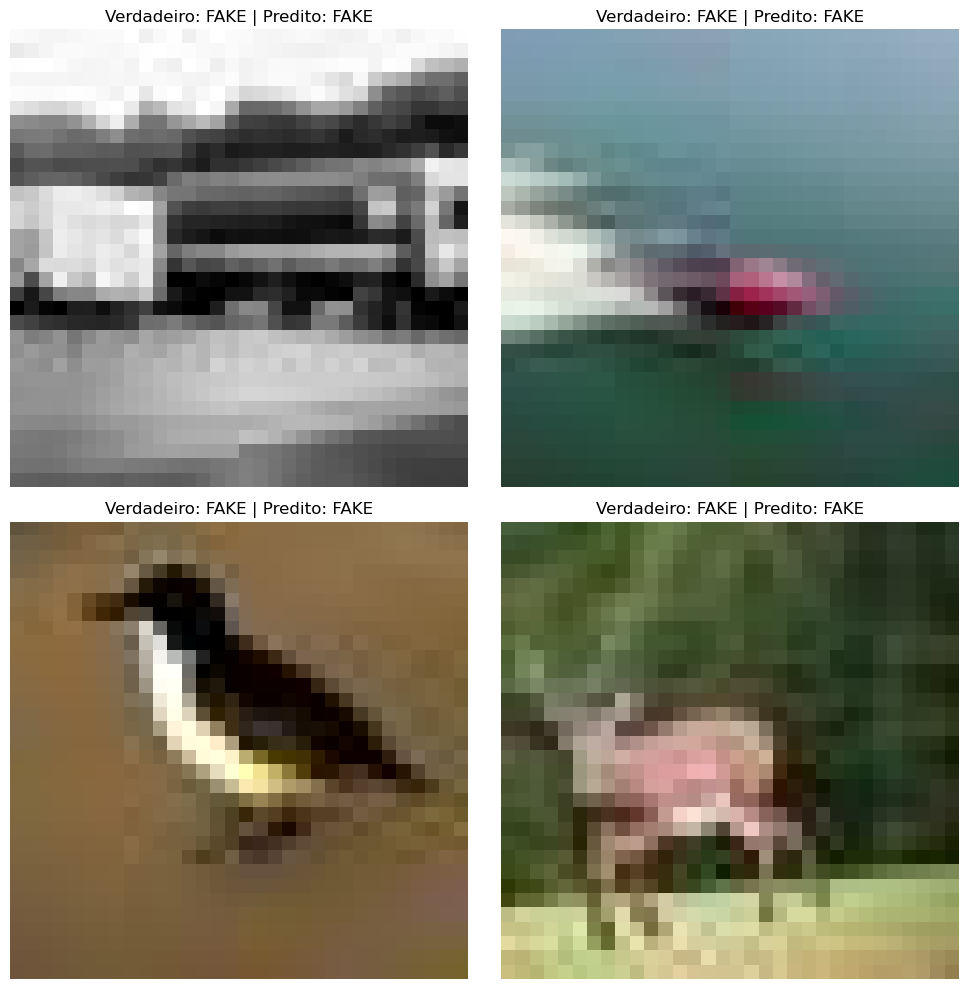

In [28]:
import random

# Seleciona 4 imagens aleatórias de um batch aleatório
for imagens, labels in ds_test.shuffle(1000).take(1):
    indices = random.sample(range(len(imagens)), 4)
    selected_images = [imagens[i] for i in indices]
    selected_labels = [labels[i].numpy() for i in indices]

    plt.figure(figsize=(10, 10))
    for i, (img, true_label) in enumerate(zip(selected_images, selected_labels)):
        img_resized = tf.image.resize(img, (224, 224))
        pred = resnet.predict(tf.expand_dims(img_resized, axis=0), verbose=0)
        pred_label = tf.argmax(pred[0]).numpy()

        plt.subplot(2, 2, i + 1)
        plt.imshow(img.numpy(), vmin=0.0, vmax=1.0)
        plt.title(f"Verdadeiro: {class_names[true_label]} | Predito: {class_names[pred_label]}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()